In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Datos Climatologia

#### 1, Guardar archivos

In [2]:
def csv_folder_to_dataframes(input_folder):
    # Ensure input folder exists
    if not os.path.exists(input_folder):
        print(f"Input folder '{input_folder}' does not exist.")
        return
    
    # List all files in the input folder
    files = os.listdir(input_folder)
    
    # Filter out only the CSV files
    csv_files = [f for f in files if f.endswith('.csv')]
    
    # Create a dictionary to store DataFrames with their names
    dataframes = {}
    
    # Convert each CSV file to DataFrame and store with the same name
    for csv_file in csv_files:
        csv_file_path = os.path.join(input_folder, csv_file)
        dataframe = pd.read_csv(csv_file_path)
        dataframe_name = os.path.splitext(csv_file)[0]  # Remove the .csv extension
        dataframes[dataframe_name] = dataframe
    
    return dataframes

In [3]:
input_folder = "../data/climatologia"

dataframes = csv_folder_to_dataframes(input_folder)

In [4]:
dataframes['cerro_prieto']

,Fecha,Precipitacion (mm),Evaporacion (mm),T_Max (C),T_Min (C)
0,1/5/1958,0,Nulo,Nulo,Nulo
1,2/5/1958,26,Nulo,Nulo,Nulo
2,3/5/1958,31,Nulo,Nulo,Nulo
3,4/5/1958,0,Nulo,Nulo,Nulo
4,5/5/1958,0,Nulo,Nulo,Nulo
...,...,...,...,...,...
20324,27/12/2020,0,1.4,26,5
20325,28/12/2020,0,7.3,27,12
20326,29/12/2020,0,6.6,26,15
20327,30/12/2020,0,7,27.5,17.5


### 2. Empty Values & Cleaning Data Types

Algunas listas contienen "None" y otras NaN. Cambiar default a NaN.

In [5]:
def replace_nulo_with_nan(dataframes):
    # Dictionary to store counts of NaN and "Nulo" values for each DataFrame
    counts = {}
    
    for name, df in dataframes.items():
        # Count NaN and "Nulo" values in the DataFrame
        nan_count = df.isna().sum().sum()
        nulo_count = (df == "Nulo").sum().sum()
        
        # Replace "Nulo" values with NaN
        df.replace("Nulo", None, inplace=True)
        df.replace(pd.NA, None, inplace=True)
        
        # Update counts dictionary
        counts[name] = {'NaN': nan_count, 'Nulo': nulo_count}
        
    return counts

counts = replace_nulo_with_nan(dataframes)

print(counts)

{'cerro_prieto': {'NaN': 0, 'Nulo': 702}, 'el_cuchillo': {'NaN': 1026, 'Nulo': 0}, 'la_boca': {'NaN': 1565, 'Nulo': 0}}


In [6]:
def convert_columns_to_numeric(dataframes, columns):
    for name, df in dataframes.items():
        for col in columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

# Example usage:
# Assuming 'dataframes' is the dictionary containing the DataFrames
# 'columns_to_convert' is the list of columns to convert to numeric data type

columns_to_convert = ['Precipitacion (mm)', "Evaporacion (mm)", "T_Max (C)", "T_Min (C)"]
convert_columns_to_numeric(dataframes, columns_to_convert)


In [7]:
dataframes['cerro_prieto']

,Fecha,Precipitacion (mm),Evaporacion (mm),T_Max (C),T_Min (C)
0,1/5/1958,0.0,NaN,NaN,NaN
1,2/5/1958,26.0,NaN,NaN,NaN
2,3/5/1958,31.0,NaN,NaN,NaN
3,4/5/1958,0.0,NaN,NaN,NaN
4,5/5/1958,0.0,NaN,NaN,NaN
...,...,...,...,...,...
20324,27/12/2020,0.0,1.4,26.0,5.0
20325,28/12/2020,0.0,7.3,27.0,12.0
20326,29/12/2020,0.0,6.6,26.0,15.0
20327,30/12/2020,0.0,7.0,27.5,17.5


In [8]:
nan_count = dataframes['la_boca'].isna().sum().sum()
nan_count

1565

### 3. Limitar area de estudio del '2007-01-01' al '2020-12-31'

In [9]:
def filter_by_date(dataframes):
    filtered_dataframes = {}
    
    for name, df in dataframes.items():
        # Convert the "Fecha" column to datetime (dayfirst=True corrigio errores)
        df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True, errors='coerce')
        
        # Filter the DataFrame based on the date range
        filtered_df = df[(df['Fecha'] >= '2007-01-01') & (df['Fecha'] <= '2020-12-31')]
        
        # Store the filtered DataFrame
        filtered_dataframes[name] = filtered_df
        
    return filtered_dataframes

filtered_dataframes = filter_by_date(dataframes)

In [10]:
# Fecha datetime format cleaning
def ensure_date_format(data_dict, date_column='Fecha'):
    for key in data_dict.keys():
        df = data_dict[key]
        if date_column in df.columns:
            # Convert 'Fecha' to date format without time component
            df[date_column] = pd.to_datetime(df[date_column]).dt.date
        data_dict[key] = df
    return data_dict

In [11]:
dataframes = ensure_date_format(dataframes)

In [12]:
filtered_dataframes['cerro_prieto']

,Fecha,Precipitacion (mm),Evaporacion (mm),T_Max (C),T_Min (C)
15611,2008-01-01,0.0,1.4,14.0,9.0
15612,2008-01-02,0.0,4.0,14.0,7.0
15613,2008-01-03,0.0,3.3,16.0,0.0
15614,2008-01-04,0.0,2.5,23.0,0.0
15615,2008-01-05,0.0,4.3,25.0,8.5
...,...,...,...,...,...
20324,2020-12-27,0.0,1.4,26.0,5.0
20325,2020-12-28,0.0,7.3,27.0,12.0
20326,2020-12-29,0.0,6.6,26.0,15.0
20327,2020-12-30,0.0,7.0,27.5,17.5


### 4. Contar valores nulos en el area filtrada

In [13]:
def missing_values_count(dataframes):
    for name, df in dataframes.items():
        # Count missing values before dropping
        missing_before = df.isnull().sum().sum()
        
        # Drop rows with missing values
#        dataframes[name] = df.dropna()
        
        # Count missing values after dropping
#        missing_after = df.isnull().sum().sum()
        
        # Print the counts
        print(f"DataFrame: {name}")
        print(f"Missing values: {missing_before}")
#        print(f"Missing values after dropping: {missing_after}")
        print("-----------------------------")

In [14]:
missing_values_count(filtered_dataframes)

DataFrame: cerro_prieto
Missing values: 174
-----------------------------
DataFrame: el_cuchillo
Missing values: 1393
-----------------------------
DataFrame: la_boca
Missing values: 253
-----------------------------


### 5. Tratamiento de valores faltantes

Utilizando los datos de otras fuentes se busca completar la informacion faltante. Una vez agotados los recursos disponibles se hara uso de metodos de imputacion de datos.

#### 5.1 Referencia cruzada

Estan a disposicion datos de las Estaciones Meteorológicas Automáticas (EMAs) ubicadas en la presa "El Cuchillo" y "El diente" que esta en proximacion a la presa de "La Boca". Desafortunadamente no hay uno disponible para la presa "Cerro Prieto".

Adicionalmente estan los datos recopilados por el SIH en sitio de las presas con informacion meteorologica.

In [15]:
EMA_cuchillo = pd.read_csv('../data/clean_data/EMAs/EMA_cuchillo.csv')
EMA_diente = pd.read_csv('../data/clean_data/EMAs/EMA_diente.csv')

In [16]:
SIH_cuchillo = pd.read_csv('../data/clean_data/presas/CCHNL.csv')
SIH_la_boca = pd.read_csv('../data/clean_data/presas/LBCNL.csv')
SIH_cerro_prieto = pd.read_csv('../data/clean_data/presas/CPRNL.csv')

In [17]:
def fill_missing_values(main_df, ref_df, columns):
    # Ensure 'Fecha' columns are in date format without time component
#    main_df['Fecha'] = pd.to_datetime(main_df['Fecha']).dt.date
    ref_df['Fecha'] = pd.to_datetime(ref_df['Fecha']).dt.date

    for column in columns:
        # Check if column exists in both DataFrames
        if column in main_df.columns and column in ref_df.columns:
            # Iterate through rows with missing values in the specified column
            for idx in main_df[main_df[column].isna()].index:
                fecha = main_df.at[idx, 'Fecha']
                # Check if 'Fecha' exists in the reference DataFrame
                if fecha in ref_df['Fecha'].values:
                    # Get the value from the reference DataFrame
                    ref_value = ref_df.loc[ref_df['Fecha'] == fecha, column].values[0]
                    # Fill the missing value in the main DataFrame
                    main_df.at[idx, column] = ref_value
    return main_df

In [18]:
columns_to_check = ['Precipitacion (mm)', 'Evaporacion (mm)', 'T_Max (C)', 'T_Min (C)']

In [19]:
filtered_dataframes['el_cuchillo'] = fill_missing_values(filtered_dataframes['el_cuchillo'], EMA_cuchillo, columns_to_check)

C:\Users\jacal\AppData\Local\Temp\ipykernel_1668\723692302.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if fecha in ref_df['Fecha'].values:
C:\Users\jacal\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [20]:
missing_values_count(filtered_dataframes)

DataFrame: cerro_prieto
Missing values: 174
-----------------------------
DataFrame: el_cuchillo
Missing values: 442
-----------------------------
DataFrame: la_boca
Missing values: 253
-----------------------------


In [21]:
filtered_dataframes['el_cuchillo'] = fill_missing_values(filtered_dataframes['el_cuchillo'], SIH_cuchillo, columns_to_check)
missing_values_count(filtered_dataframes)

C:\Users\jacal\AppData\Local\Temp\ipykernel_1668\723692302.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if fecha in ref_df['Fecha'].values:
C:\Users\jacal\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


DataFrame: cerro_prieto
Missing values: 174
-----------------------------
DataFrame: el_cuchillo
Missing values: 1
-----------------------------
DataFrame: la_boca
Missing values: 253
-----------------------------


In [22]:
missing_values_count(filtered_dataframes['el_cuchillo'])

DataFrame: Fecha
Missing values: 0
-----------------------------
DataFrame: Precipitacion (mm)
Missing values: 0
-----------------------------
DataFrame: Evaporacion (mm)
Missing values: 0
-----------------------------
DataFrame: T_Max (C)
Missing values: 1
-----------------------------
DataFrame: T_Min (C)
Missing values: 0
-----------------------------


In [23]:
filtered_dataframes['la_boca'] = fill_missing_values(filtered_dataframes['la_boca'], EMA_diente, columns_to_check)
filtered_dataframes['la_boca'] = fill_missing_values(filtered_dataframes['la_boca'], SIH_la_boca, columns_to_check)
missing_values_count(filtered_dataframes)

C:\Users\jacal\AppData\Local\Temp\ipykernel_1668\723692302.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if fecha in ref_df['Fecha'].values:
C:\Users\jacal\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\jacal\AppData\Local\Temp\ipykernel_1668\723692302.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' 

DataFrame: cerro_prieto
Missing values: 174
-----------------------------
DataFrame: el_cuchillo
Missing values: 1
-----------------------------
DataFrame: la_boca
Missing values: 3
-----------------------------


In [24]:
missing_values_count(filtered_dataframes['la_boca'])

DataFrame: Fecha
Missing values: 0
-----------------------------
DataFrame: Precipitacion (mm)
Missing values: 0
-----------------------------
DataFrame: Evaporacion (mm)
Missing values: 1
-----------------------------
DataFrame: T_Max (C)
Missing values: 1
-----------------------------
DataFrame: T_Min (C)
Missing values: 1
-----------------------------


In [25]:
filtered_dataframes['cerro_prieto'] = fill_missing_values(filtered_dataframes['cerro_prieto'], SIH_cerro_prieto, columns_to_check)
missing_values_count(filtered_dataframes)

C:\Users\jacal\AppData\Local\Temp\ipykernel_1668\723692302.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if fecha in ref_df['Fecha'].values:
C:\Users\jacal\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


DataFrame: cerro_prieto
Missing values: 21
-----------------------------
DataFrame: el_cuchillo
Missing values: 1
-----------------------------
DataFrame: la_boca
Missing values: 3
-----------------------------


In [26]:
missing_values_count(filtered_dataframes['cerro_prieto'])

DataFrame: Fecha
Missing values: 0
-----------------------------
DataFrame: Precipitacion (mm)
Missing values: 0
-----------------------------
DataFrame: Evaporacion (mm)
Missing values: 0
-----------------------------
DataFrame: T_Max (C)
Missing values: 21
-----------------------------
DataFrame: T_Min (C)
Missing values: 0
-----------------------------


#### 5.2 Revision de resultados e imputacion manual de datos

Viendo los datos obtenidos, son minimos los datos faltantes con un total de 25, por lo que se imputaran los datos faltantes de manera manual en excel

In [27]:
def save_dataframes_as_csv(data_dict, output_dir='./'):
    for filename, df in data_dict.items():
        # Construct the full path for the CSV file
        csv_path = f"{output_dir}/{filename}.csv"
        # Save the DataFrame to a CSV file
        df.to_csv(csv_path, index=False)
        print(f"Saved {filename} to {csv_path}")

In [28]:
save_dataframes_as_csv(filtered_dataframes, output_dir='../data/climatologia/test_2008_2020')

Saved cerro_prieto to ../data/climatologia/test/cerro_prieto.csv
Saved el_cuchillo to ../data/climatologia/test/el_cuchillo.csv
Saved la_boca to ../data/climatologia/test/la_boca.csv


### 6. Visualizacion de datos

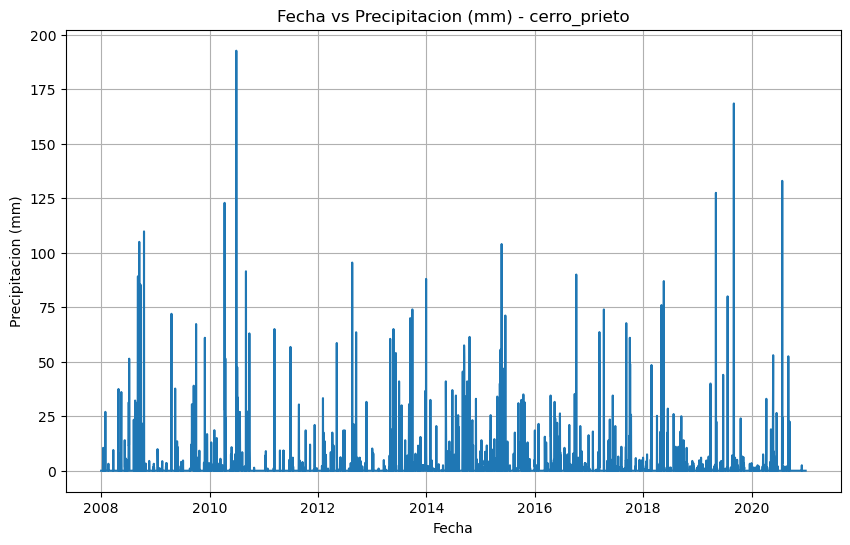

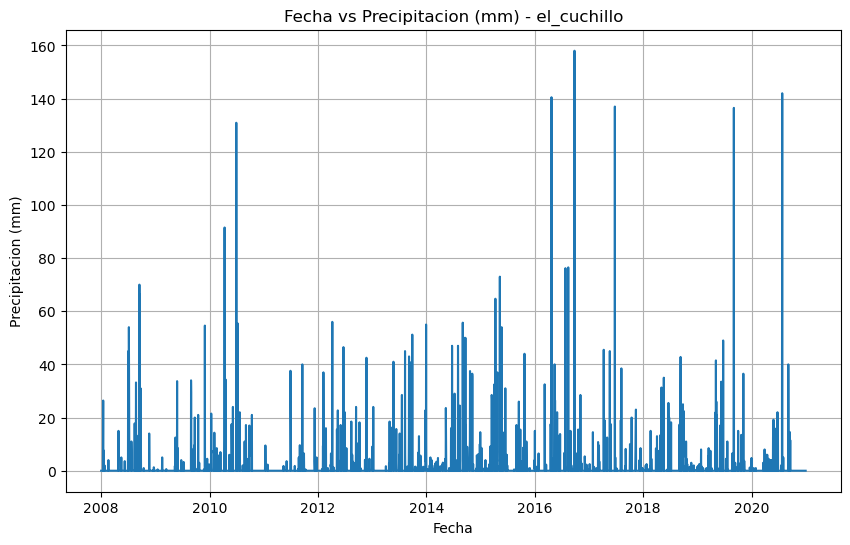

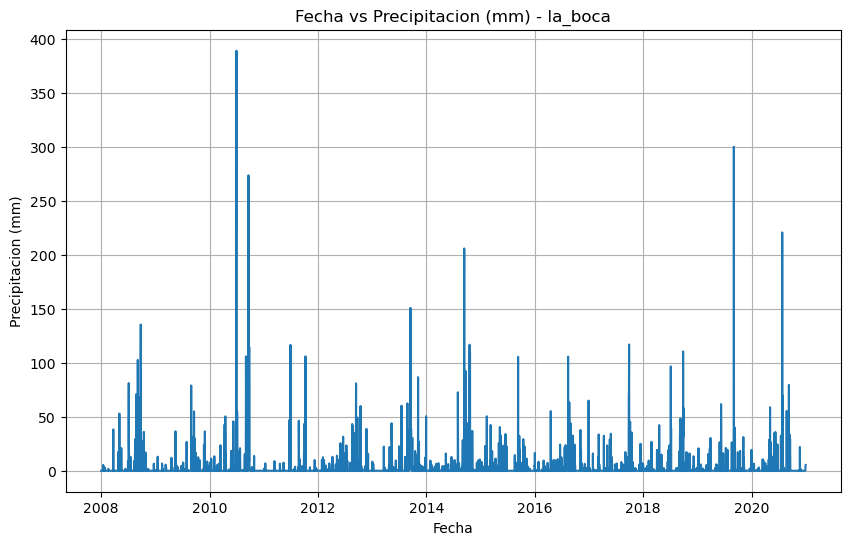

In [41]:
def plot_precipitation(dataframes):
    for name, df in dataframes.items():
        # Drop rows with missing values in 'Fecha' or 'Precipitacion (mm)' columns
#        df.dropna(subset=['Fecha', 'Precipitacion (mm)'], inplace=True)
        
        # Plot Fecha vs Precipitacion (mm)
        plt.figure(figsize=(10, 6))
        plt.plot(df['Fecha'], df['Precipitacion (mm)'])
        plt.title(f'Fecha vs Precipitacion (mm) - {name}')
        plt.xlabel('Fecha')
        plt.ylabel('Precipitacion (mm)')
        plt.grid(True)
        plt.show()

# Example usage:
# Assuming 'filtered_dataframes' is the dictionary containing the filtered DataFrames
plot_precipitation(filtered_dataframes)


### 7. Creacion de databases del 2000-1-1 al 2023-12-31

Voy a llenar la base de datos de acuerdo al siguiente orden: climatologia > EMAs > presas

In [48]:
def generate_empty_dataframes(start_date, end_date):
    # Create a date range
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    
    # Create data for the columns with empty values
    data = {
        'Fecha': date_range,
        'Precipitacion (mm)': np.nan,
        'Evaporacion (mm)': np.nan,
        'T_Max (C)': np.nan,
        'T_Min (C)': np.nan
    }

    # Create a DataFrame
    df = pd.DataFrame(data)
    return df

# Generate three DataFrames with the specified date range
df_el_cuchillo = generate_empty_dataframes('2000-01-01', '2023-12-31')
df_la_boca = generate_empty_dataframes('2000-01-01', '2023-12-31')
df_cerro_prieto = generate_empty_dataframes('2000-01-01', '2023-12-31')

# Create a dictionary with these DataFrames
test_dict = {
    'df_el_cuchillo': df_el_cuchillo,
    'df_la_boca': df_la_boca,
    'df_cerro_prieto': df_cerro_prieto
}

In [50]:
missing_values_count(test_dict)

DataFrame: df_el_cuchillo
Missing values: 35064
-----------------------------
DataFrame: df_la_boca
Missing values: 35064
-----------------------------
DataFrame: df_cerro_prieto
Missing values: 35064
-----------------------------


In [52]:
test_dict = ensure_date_format(test_dict)

In [54]:
test_dict['df_el_cuchillo'] = fill_missing_values(test_dict['df_el_cuchillo'], filtered_dataframes['el_cuchillo'], columns_to_check)
missing_values_count(test_dict)

C:\Users\jacal\AppData\Local\Temp\ipykernel_1668\723692302.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_df['Fecha'] = pd.to_datetime(ref_df['Fecha']).dt.date


DataFrame: df_el_cuchillo
Missing values: 16129
-----------------------------
DataFrame: df_la_boca
Missing values: 35064
-----------------------------
DataFrame: df_cerro_prieto
Missing values: 35064
-----------------------------


In [55]:
test_dict['df_la_boca'] = fill_missing_values(test_dict['df_la_boca'], filtered_dataframes['la_boca'], columns_to_check)
test_dict['df_cerro_prieto'] = fill_missing_values(test_dict['df_cerro_prieto'], filtered_dataframes['cerro_prieto'], columns_to_check)

missing_values_count(test_dict)

C:\Users\jacal\AppData\Local\Temp\ipykernel_1668\723692302.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_df['Fecha'] = pd.to_datetime(ref_df['Fecha']).dt.date
C:\Users\jacal\AppData\Local\Temp\ipykernel_1668\723692302.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_df['Fecha'] = pd.to_datetime(ref_df['Fecha']).dt.date


DataFrame: df_el_cuchillo
Missing values: 16129
-----------------------------
DataFrame: df_la_boca
Missing values: 16071
-----------------------------
DataFrame: df_cerro_prieto
Missing values: 16213
-----------------------------


In [57]:
test_dict['df_el_cuchillo'] = fill_missing_values(test_dict['df_el_cuchillo'], EMA_cuchillo, columns_to_check)
test_dict['df_la_boca'] = fill_missing_values(test_dict['df_la_boca'], EMA_diente, columns_to_check)
missing_values_count(test_dict)

DataFrame: df_el_cuchillo
Missing values: 5728
-----------------------------
DataFrame: df_la_boca
Missing values: 13128
-----------------------------
DataFrame: df_cerro_prieto
Missing values: 16213
-----------------------------


In [59]:
test_dict['df_el_cuchillo'] = fill_missing_values(test_dict['df_el_cuchillo'], SIH_cuchillo, columns_to_check)
test_dict['df_la_boca'] = fill_missing_values(test_dict['df_la_boca'], SIH_la_boca, columns_to_check)
test_dict['df_cerro_prieto'] = fill_missing_values(test_dict['df_cerro_prieto'], SIH_cerro_prieto, columns_to_check)

missing_values_count(test_dict)

DataFrame: df_el_cuchillo
Missing values: 1834
-----------------------------
DataFrame: df_la_boca
Missing values: 6177
-----------------------------
DataFrame: df_cerro_prieto
Missing values: 8186
-----------------------------


In [61]:
missing_values_count(test_dict['df_el_cuchillo'])

DataFrame: Fecha
Missing values: 0
-----------------------------
DataFrame: Precipitacion (mm)
Missing values: 0
-----------------------------
DataFrame: Evaporacion (mm)
Missing values: 395
-----------------------------
DataFrame: T_Max (C)
Missing values: 720
-----------------------------
DataFrame: T_Min (C)
Missing values: 719
-----------------------------


In [62]:
missing_values_count(test_dict['df_la_boca'])

DataFrame: Fecha
Missing values: 0
-----------------------------
DataFrame: Precipitacion (mm)
Missing values: 0
-----------------------------
DataFrame: Evaporacion (mm)
Missing values: 79
-----------------------------
DataFrame: T_Max (C)
Missing values: 3049
-----------------------------
DataFrame: T_Min (C)
Missing values: 3049
-----------------------------


In [63]:
missing_values_count(test_dict['df_cerro_prieto'])

DataFrame: Fecha
Missing values: 0
-----------------------------
DataFrame: Precipitacion (mm)
Missing values: 17
-----------------------------
DataFrame: Evaporacion (mm)
Missing values: 52
-----------------------------
DataFrame: T_Max (C)
Missing values: 4069
-----------------------------
DataFrame: T_Min (C)
Missing values: 4048
-----------------------------


In [60]:
save_dataframes_as_csv(test_dict, output_dir='../data/climatologia/test_2000_2023')

Saved df_el_cuchillo to ../data/climatologia/test_2000_2023/df_el_cuchillo.csv
Saved df_la_boca to ../data/climatologia/test_2000_2023/df_la_boca.csv
Saved df_cerro_prieto to ../data/climatologia/test_2000_2023/df_cerro_prieto.csv


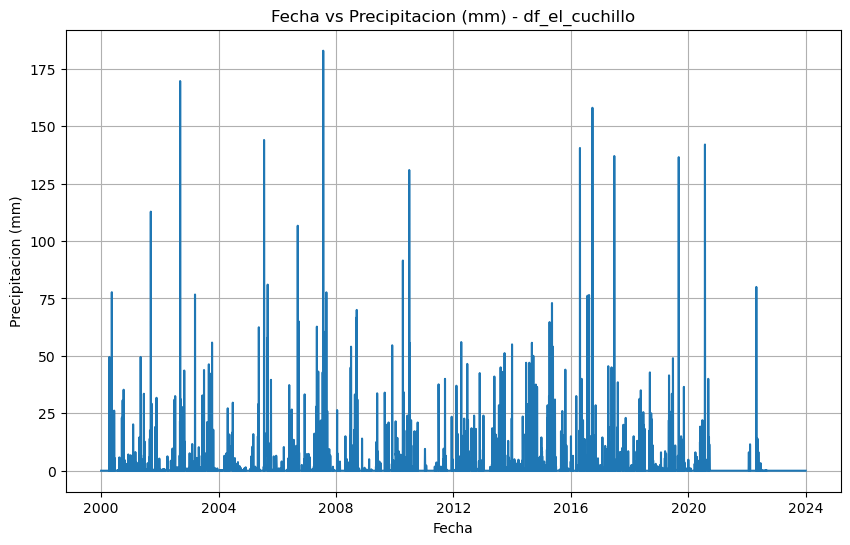

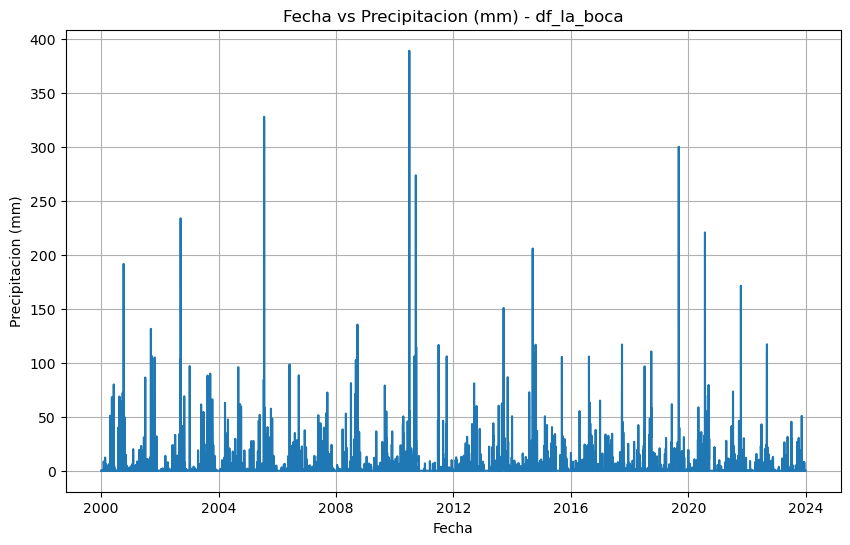

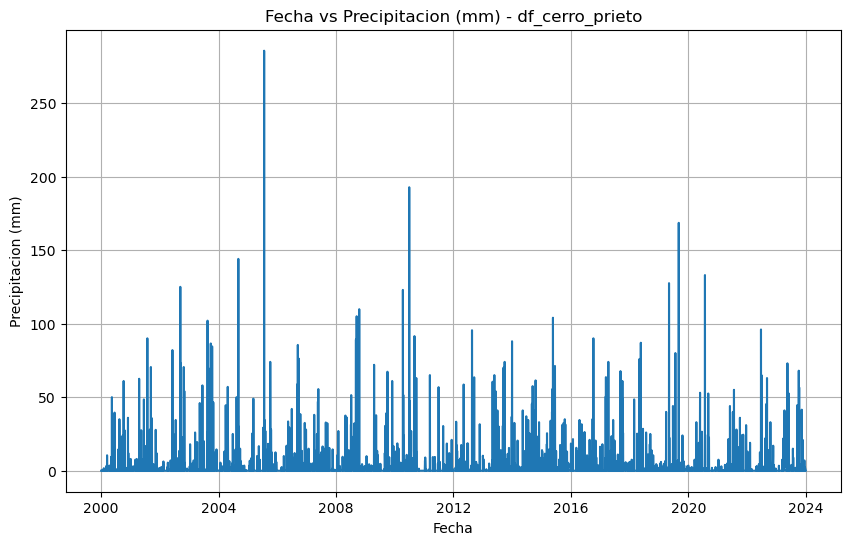

In [64]:
plot_precipitation(test_dict)